In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
with open('ng15_rcparams.json', 'rb') as fin:
    plt.rcParams.update(json.load(fin))
from astropy.time import Time
from enterprise_extensions.model_utils import bayes_fac

In [2]:
def patch_violinplot(fc="none"):
    from matplotlib.collections import PolyCollection
    ax = plt.gca()
    for art in ax.get_children():
        if isinstance(art, PolyCollection):
            c = art.get_facecolor()
            art.set_edgecolor(c)
            art.set_linewidth(1)
            art.set_facecolor(fc)
            art.set_alpha(0.6)

In [3]:
# DATA CAN BE DOWNLOADED HERE: https://drive.google.com/drive/folders/1L_DfKL9HPEj7LK8CW8pA3zwBaqUqcZFk?usp=share_link
mcos_results = pd.read_feather('mcos_results/mcos_results_500.feather')
scos_results = pd.read_feather('scos_results/scos_results_500.feather')

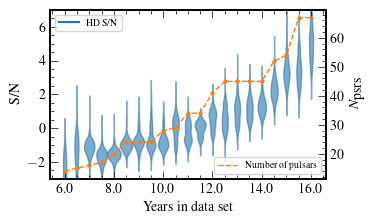

In [4]:
plt.figure()
# bool_cond = (mcos_results['start_time']==53216.0) &  (mcos_results['end_time'] > 55237) & ~(mcos_results['end_time'] == 59072.0)
bool_cond_scos = (scos_results['start_time']==53216.0) &  (scos_results['end_time'] > 55237) & ~(scos_results['end_time'] == 59072.0)
sns.violinplot(scos_results.loc[bool_cond_scos], x="end_time", y="HD_SNR", inner=None, color='C0', width=1.1, label='HD', zorder=1000, lw=1)

# get unique end times for the slices, change them to dates
ets_unique = np.unique(scos_results.loc[scos_results['start_time']==53216.0]['end_time']).astype(int)
ets_unique = np.array([et for et in ets_unique if (et > 55237) and ~(et == 59072.0)])
# By accident there's an extra slice in there at MJD 59072. I've removed it.
ets = [Time(et, format='mjd').strftime('%m/%Y') for et in ets_unique if (et > 55237) and ~(et == 59072.0)]
ets_time_total = np.array([np.round((et - 53216) / 365.25, 1) for et in ets_unique])
patch_violinplot('C0')
# sns.violinplot(scos_results.loc[bool_cond_scos], x="end_time", y="HD_SNR", inner=None, color='C0', width=1.1, label='HD', zorder=1000, lw=1)

# number of pulsars...
npsrs = [np.unique(scos_results.loc[bool_cond_scos].loc[(scos_results['end_time']==etu)]['number_of_psrs'])[0] for etu in ets_unique]

# plt.gca().set_xticklabels(ets)
xticks = plt.gca().get_xticks()
plt.gca().set_xticks(xticks[::4])
plt.gca().set_xticklabels(ets_time_total[::4])
plt.plot([], [], c='C0', label='HD S/N')
plt.ylim(-3, 7)

plt.ylabel('S/N')


plt.legend(loc='upper left')
diffs = np.diff(npsrs)
ax = plt.gca()

# plt.xticks(rotation=90, fontsize=8)
plt.gca().tick_params(which='minor')
plt.xlabel('Years in data set')

# Plot number of pulsars on right hand axis.
ax2 = ax.twinx()
ax2.plot(np.arange(np.size(npsrs)), npsrs, lw=1, c='C1', label='Number of pulsars', zorder=-100, ls='--')
ax2.scatter(np.arange(np.size(npsrs)), npsrs, c='C1', s=4)
ax2.set_ylabel('$N_{\\textrm{psrs}}$')
ax2.legend(loc='lower right')


plt.savefig("forward_slices.pdf", bbox_inches='tight')
plt.savefig("forward_slices.png", bbox_inches='tight')
plt.show()
plt.close()